<a href="https://colab.research.google.com/github/nihadse/H4ckT0b3rF3st-2k21/blob/main/Telecommunication_Customer_Churn_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Designing churn prediction workflow**
The overall scope to build an ML-powered application to forecast customer churn is generic to standardized ML project structure that includes the following steps:

1. **Defining problem and goal**: It’s 
essential to understand what insights you need to get from the analysis and prediction. Understand the problem and collect requirements, stakeholder pain points, and expectations.
2. **Establishing data source**: Next, specify data sources that will be necessary for the modeling stage. Some popular sources of churn data are CRM systems, analytics services, and customer feedback.
3. **Data preparation**, exploration, and preprocessing: Raw historical data for solving the problem and building predictive models needs to be transformed into a format suitable for machine learning algorithms. This step can also improve overall results by increasing the quality of data.
4. **Modeling and testing**: This covers the development and performance validation of customers churn prediction models with various machine learning algorithms.
5. **Deployment and monitoring**: This is the last stage in applying machine learning for churn rate prediction. Here, the most suitable model is se2.nt into production. It can be either integrated into existing software, or become the core of a newly built application.

# **Telecom churn prediction system use case**
The churn rate is very important in the telecommunications industry (wireless and cable service providers, satellite television providers, internet providers, etc). The churn rate in this use case provides clarity on the quality of the business, shows customer satisfaction with the product or service, and allows for comparison with competitors to gauge an acceptable level of churn.

In [596]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [597]:
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [598]:
# Loading the data
path="/content/drive/MyDrive/Telco-Customer-Churn.csv"


In [599]:
data = pd.read_csv(path)

In [600]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### There are 17 categorical features:

**CustomerID**: Customer ID unique for each customer

**gender**: Whether the customer is a male or a female

**SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

**Partner:** Whether the customer has a partner or not (Yes, No)

**Dependent:** Whether the customer has dependents or not (Yes, No)

**PhoneService:** Whether the customer has a phone service or not (Yes, No)

**MultipeLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity: **Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup**: Whether the customer has an online backup or not (Yes, No, No internet service)

**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract:** The contract term of the customer (Month-to-month, One year, Two years)

**PaperlessBilling:** The contract term of the customer (Month-to-month, One year, Two years)
**PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
Next, there are 3 numerical features:
**Tenure:** Number of months the customer has stayed with the company
**MonthlyCharges:** The amount charged to the customer monthly
**TotalCharges:** The total amount charged to the customer
Finally, there’s a prediction feature:
**Churn:** Whether the customer churned or not (Yes or No)
These features can also be subdivided into:

***Demographic customer information:***

gender , SeniorCitizen , Partner , Dependents
Services that each customer has signed up for:
PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,
Customer account information:
tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges '''

'CustomerID: Customer ID unique for each customer\ngender: Whether the customer is a male or a female\nSeniorCitizen: Whether the customer is a senior citizen or not (1, 0)\nPartner: Whether the customer has a partner or not (Yes, No)\nDependent: Whether the customer has dependents or not (Yes, No)\nPhoneService: Whether the customer has a phone service or not (Yes, No)\nMultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)\nInternetService: Customer’s internet service provider (DSL, Fiber optic, No)\nOnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)\nOnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)\nDeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)\nTechSupport: Whether the customer has tech support or not (Yes, No, No internet service)\nStreamingTV: Whether the customer has streaming TV or not (Yes, No, No intern

In [602]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [603]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [604]:
# data columns 
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [605]:
#missing values 
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [607]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [608]:
data.shape

(7043, 21)

In [609]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [610]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [611]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [612]:
data['SeniorCitizen'].unique()

array([0, 1])

In [613]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [614]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [615]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [616]:
data['PaperlessBilling'].unique() 

array(['Yes', 'No'], dtype=object)

In [617]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [618]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [619]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [620]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [621]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [622]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [623]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [624]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [625]:
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [626]:
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [627]:
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [628]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [629]:
data['customerID'].nunique()

7043

In [630]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


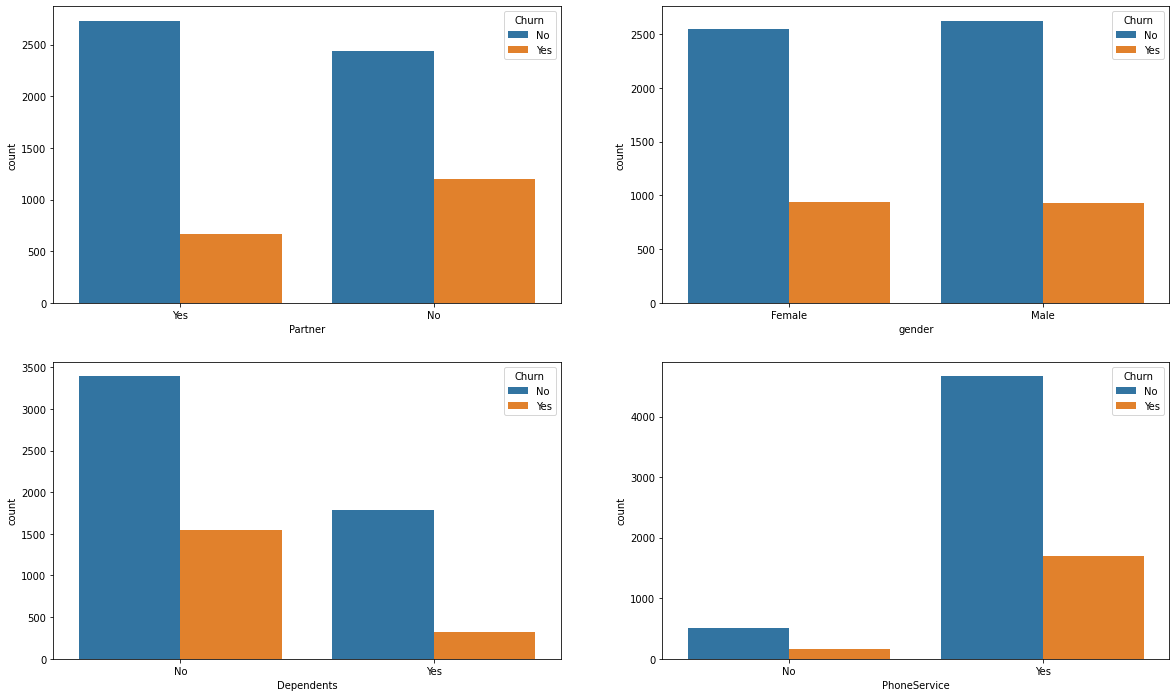

In [631]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Partner', hue = 'Churn',data = data, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'Churn',data = data, ax=axarr[0][1])
sns.countplot(x='Dependents', hue = 'Churn',data = data, ax=axarr[1][0])
sns.countplot(x='PhoneService', hue = 'Churn',data = data, ax=axarr[1][1])

In [632]:
# Select Numeric columns
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print(numeric_cols)

['SeniorCitizen' 'tenure' 'MonthlyCharges']


In [633]:
# select non numeric columns
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
print(non_numeric_cols)

['customerID' 'gender' 'Partner' 'Dependents' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'TotalCharges' 'Churn']


In [634]:
#Defining bar chart function
def bar(feature, df=data ):
    #Groupby the categorical feature
    temp_df = data.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()


In [635]:
#Gender feature plot
bar('gender')
#SeniorCitizen feature plot 
data.loc[data.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
data.loc[data.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
bar('SeniorCitizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')

In [636]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

In [638]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [640]:
#Replace Values in DataFrame
data['gender'] = data['gender'].replace(['Female'], '0')
data['gender'] = data['gender'].replace(['Male'], '1')
data['Partner'] = data['Partner'].replace(['Yes'], '1')
data['Partner'] = data['Partner'].replace(['No'], '0')
data['Churn'] = data['Churn'].replace(['Yes'], '1')
data['Churn'] = data['Churn'].replace(['No'], '0')
data['Dependents'] = data['Dependents'].replace(['Yes'], '1')
data['Dependents'] = data['Dependents'].replace(['No'], '0')
data['PhoneService'] = data['PhoneService'].replace(['Yes'], '1')
data['PhoneService'] = data['PhoneService'].replace(['No'], '0')
data['PaperlessBilling'] = data['PaperlessBilling'].replace(['Yes'], '1')
data['PaperlessBilling'] = data['PaperlessBilling'].replace(['No'], '0')
data['SeniorCitizen'] = data['SeniorCitizen'].replace(['Yes'], '1')
data['SeniorCitizen'] = data['SeniorCitizen'].replace(['No'], '0')


In [641]:
data['SeniorCitizen'].unique()

array(['0', '1'], dtype=object)

In [642]:
# transform the categorical data to numerical data
data['gender'] = data['gender'].astype('int32')
data['Partner'] = data['Partner'].astype('int32')
data['Churn'] = data['Churn'].astype('int32')
data['Dependents'] = data['Dependents'].astype('int32')
data['PaperlessBilling'] = data['PaperlessBilling'].astype('int32')
data['PhoneService'] = data['PhoneService'].astype('int32')
data['SeniorCitizen'] = data['SeniorCitizen'].astype('int32')

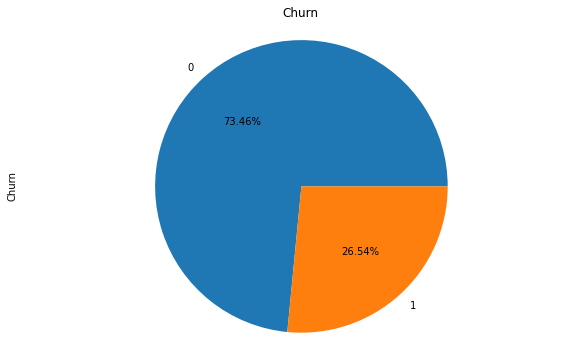

In [643]:
#churn graph 

data['Churn'].value_counts().sort_values(ascending=False).head(10)
data['Churn'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Churn", autopct='%1.2f%%')
plt.axis('equal')
plt.show()

In [644]:
d = data.groupby("gender")[["Churn"]].count()
d

,Churn
gender,
0,3488
1,3555


In [645]:
data.dtypes

customerID           object
gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [646]:
# Let’s catch the error
try:
    data['TotalCharges'] = data_non_numeric['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ''


In [647]:
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [648]:
#InternetService
data['InternetService'] = data['InternetService'].replace(['DSL'], '1')
data['InternetService'] = data['InternetService'].replace(['Fiber optic'], '2')
data['InternetService'] = data['InternetService'].replace(['No'], '0')
#OnlineSecurity    
data['OnlineSecurity'] = data['OnlineSecurity'].replace(['Yes'], '1')
data['OnlineSecurity'] = data['OnlineSecurity'].replace(['No'], '0')
data['OnlineSecurity'] = data['OnlineSecurity'].replace(['No internet service'], '2')
#PaymentMethod
data['PaymentMethod'] = data['PaymentMethod'].replace(['Electronic check'], '1')
data['PaymentMethod'] = data['PaymentMethod'].replace(['Mailed check'], '2')
data['PaymentMethod'] = data['PaymentMethod'].replace(['Bank transfer (automatic)'], '3')
data['PaymentMethod'] = data['PaymentMethod'].replace(['Credit card (automatic)'], '4')
#MultipleLines
data['MultipleLines'] = data['MultipleLines'].replace(['No phone service'], '2')
data['MultipleLines'] = data['MultipleLines'].replace(['No'], '0')
data['MultipleLines'] = data['MultipleLines'].replace(['Yes'], '1')
#OnlineBackup
data['OnlineBackup'] = data['OnlineBackup'].replace(['No'], '0')
data['OnlineBackup'] = data['OnlineBackup'].replace(['Yes'], '1')
data['OnlineBackup'] = data['OnlineBackup'].replace(['No internet service'], '2')
#DeviceProtection
data['DeviceProtection'] = data['DeviceProtection'].replace(['No'], '0')
data['DeviceProtection'] = data['DeviceProtection'].replace(['Yes'], '1')
data['DeviceProtection'] = data['DeviceProtection'].replace(['No internet service'], '2')
#TechSupport
data['TechSupport'] = data['TechSupport'].replace(['No'], '0')
data['TechSupport'] = data['TechSupport'].replace(['Yes'], '1')
data['TechSupport'] = data['TechSupport'].replace(['No internet service'], '2')
# Contract
data['Contract'] = data['Contract'].replace(['Month-to-month'], '0')
data['Contract'] = data['Contract'].replace(['One year'], '1')
data['Contract'] = data['Contract'].replace(['Two year'], '2')
#StreamingTV
data['StreamingTV'] = data['StreamingTV'].replace(['No internet service'], '2')
data['StreamingTV'] = data['StreamingTV'].replace(['Yes'], '1')
data['StreamingTV'] = data['StreamingTV'].replace(['No'], '0')
#StreamingMovies
data['StreamingMovies'] = data['StreamingMovies'].replace(['No internet service'], '2')
data['StreamingMovies'] = data['StreamingMovies'].replace(['Yes'], '1')
data['StreamingMovies'] = data['StreamingMovies'].replace(['No'], '0')


In [649]:
#transform the categorical data to numerical data
data['InternetService'] = data['InternetService'].astype('int64')
data['OnlineSecurity'] = data['OnlineSecurity'].astype('int64')
data['PaymentMethod'] = data['PaymentMethod'].astype('int64')
data['MultipleLines'] = data['MultipleLines'].astype('int64')
data['OnlineBackup'] = data['OnlineBackup'].astype('int64')
data['DeviceProtection'] = data['DeviceProtection'].astype('int64')
data['TechSupport'] = data['TechSupport'].astype('int64')
data['Contract'] = data['Contract'].astype('int64')
data['StreamingTV'] = data['StreamingTV'].astype('int64')
data['StreamingMovies'] = data['StreamingMovies'].astype('int64')

In [650]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')


In [665]:
#Fill the missing values with with the median value
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [651]:
# The customerID column isnt useful as the feature is used for identification of customers. 
data.drop(["customerID"],axis=1,inplace = True)

In [652]:
# Checking the correlation between features
corr = data.corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [653]:
df= data[['MonthlyCharges','TotalCharges']]
df

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


In [654]:
data.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int32
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [655]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data.columns]

#Effect the change to the dataframe column names
data.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7012
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.6
Date:                Sat, 07 Jan 2023   Deviance:                       5833.2
Time:                        21:50:59   Pearson chi2:                 8.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9462      0.239  

you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05, it means that the feature affects Churn in a statistically significant way. Examples are:

*   SeniorCitizen
*   Tenure
*   Contract
*   PaperlessBillings etc.
The second question about feature importances can be answered by looking at the exponential coefficient values. The exponential coefficient estimates the expected change in churn through a given feature by a change of one unit.




In [656]:
np.exp(res.params)


Intercept           0.388213
gender              0.974401
SeniorCitizen       1.251311
Partner             1.007613
Dependents          0.857286
tenure              0.943230
PhoneService        1.378013
MultipleLines       1.391020
InternetService     3.190637
OnlineSecurity      0.712424
OnlineBackup        0.905854
DeviceProtection    1.021150
TechSupport         0.728365
StreamingTV         1.417986
StreamingMovies     1.432731
Contract            0.508086
PaperlessBilling    1.428683
PaymentMethod       0.874233
MonthlyCharges      0.985030
TotalCharges        1.000310
dtype: float64

The range of all features should be normalized so that each feature contributes approximately proportionately to the final distance, so we do feature scaling.

In [657]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data['tenure'] = sc.fit_transform(data[['tenure']])
data['MonthlyCharges'] = sc.fit_transform(data[['MonthlyCharges']])
data['TotalCharges'] = sc.fit_transform(data[['TotalCharges']])

In [595]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,2,1,0,1,0,0,0,0,0,1,1,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,1,1,0,1,0,0,0,1,0,2,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,1,1,1,0,0,0,0,0,1,2,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,2,1,1,0,1,1,0,0,1,0,3,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,2,0,0,0,0,0,0,0,1,1,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,1,0,1,1,1,1,1,1,2,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,2,0,1,1,0,1,1,1,1,4,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,2,1,1,0,0,0,0,0,0,1,1,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,1,2,0,0,0,0,0,0,0,1,2,0.558706,0.033210,1


**Data Modeling**

In [670]:
# drop NAN values in data frame
data.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,2,1,0,1,0,0,0,0,0,1,1,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,1,1,0,1,0,0,0,1,0,2,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,1,1,1,0,0,0,0,0,1,2,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,2,1,1,0,1,1,0,0,1,0,3,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,2,0,0,0,0,0,0,0,1,1,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,1,0,1,1,1,1,1,1,2,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,2,0,1,1,0,1,1,1,1,4,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,2,1,1,0,0,0,0,0,0,1,1,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,1,2,0,0,0,0,0,0,0,1,2,0.558706,0.033210,1


In [671]:
#Split data into train and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

**Feature Selection**

# **SVM**

In [683]:
from sklearn.feature_selection import RFE

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
print('Chosen best  10 feature by rfe:',X.columns[selector.support_])

Chosen best  10 feature by rfe: Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [691]:
#Split data into train and test sets
X_SVC = data[['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MonthlyCharges', 'TotalCharges']]
y_SVC = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X_SVC, y_SVC, test_size=0.3, random_state=50)

In [700]:
X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = train_test_split(X_SVC, y_SVC, test_size=0.3, random_state=50)

svc_model = SVC()
svc_model.fit(X_train_SVC,y_train_SVC)
predict_y = svc_model.predict(X_test_SVC)
accuracy_svc = svc_model.score(X_test_SVC,y_test_SVC)
print("SVM accuracy is :",accuracy_svc)
print(" SVM  Classification report ", classification_report(y_test_SVC,predict_y))

SVM accuracy is : 0.7832465688594415
 SVM  Classification report                precision    recall  f1-score   support

           0       0.82      0.90      0.86      1556
           1       0.62      0.46      0.53       557

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



Text(0.5, 1.0, 'Accuracy Score: 0.7832465688594415')

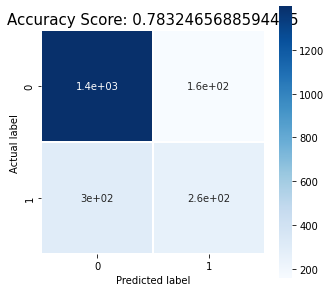

In [701]:
cm = confusion_matrix(y_test_SVC, predict_y)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svc_model.score(X_test_SVC,y_test_SVC))
plt.title(all_sample_title, size = 15)

# **XGBOOST**

In [702]:
from xgboost import XGBClassifier
estimator_xgboost = XGBClassifier()
selector_xgboost = RFE(estimator_xgboost, n_features_to_select=10, step=1)
selector_xgboost = selector.fit(X, y)
print('Chosen best  10 feature by rfe:',X.columns[selector_xgboost.support_])

Chosen best  10 feature by rfe: Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [703]:
#Split data into train and test sets
X_xgboost = data[['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MonthlyCharges', 'TotalCharges']]
y_xgboost = data['Churn']

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(X_xgboost, y_xgboost, test_size=0.3, random_state=50)

In [710]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier() 
xgb_model.fit(X_train_xgboost, y_train_xgboost)
y_pred_xgboost= xgb_model.predict(X_test_xgboost)
print("Accuracy Score :", accuracy_score(y_test_xgboost, y_pred_xgboost)*100, "%")
print(" XGBOOST  Classification report ", classification_report(y_test_xgboost,y_pred_xgboost))

Accuracy Score : 79.08187411263606 %
 XGBOOST  Classification report                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1556
           1       0.63      0.50      0.56       557

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



Text(0.5, 1.0, 'Accuracy Score: 0.7908187411263606')

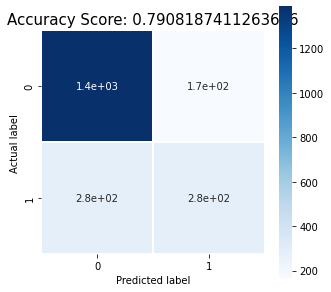

In [715]:
cm = confusion_matrix(y_test_xgboost,y_pred_xgboost)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test_xgboost,y_test_xgboost))
plt.title(all_sample_title, size = 15)

# **RandomForestClassifier**

In [716]:
clf_rf= RandomForestClassifier()      
rfe = RFE(estimator=clf_rf, n_features_to_select=10, step=1)
rfe = rfe.fit(X, y)
print('Chosen best  10 feature by rfe:',X.columns[rfe.support_])

Chosen best  10 feature by rfe: Index(['gender', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [717]:
#Split data into train and test sets
X_rf = data[['gender', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges']]
y_rf = data['Churn']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=50)

In [718]:
rfc = RandomForestClassifier()
rfc.fit(X_train_rf, y_train_rf)
y_pred_rfc= rfc.predict(X_test_rf)
print("Accuracy Score :", accuracy_score(y_test_rf, y_pred_rfc)*100, "%")
print(" RF  Classification report ", classification_report(y_test_rf,y_pred_rfc))

Accuracy Score : 78.60861334595361 %
 RF  Classification report                precision    recall  f1-score   support

           0       0.84      0.88      0.86      1556
           1       0.61      0.53      0.57       557

    accuracy                           0.79      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



# **Decision Tree**

In [723]:
dtree = DecisionTreeClassifier()
dtree  = RFE(estimator=dtree , n_features_to_select=10, step=1)
dtree  = dtree .fit(X, y)
print('Chosen best  10 feature by dtree :',X.columns[dtree .support_])

Chosen best  10 feature by dtree : Index(['gender', 'Partner', 'tenure', 'MultipleLines', 'InternetService',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [721]:
#Split data into train and test sets
X_dtree = data[['gender', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges']]
y_dtree = data['Churn']
X_train_dtree, X_test_dtree, y_train_dtree, y_test_dtree = train_test_split(X_dtree, y_dtree, test_size=0.3, random_state=50)

In [724]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train_dtree,y_train_dtree)
y_pred_dtree= dtree.predict(X_test_dtree)
print("Accuracy Score :", accuracy_score(y_test_dtree, y_pred_dtree)*100, "%")
print(" RF  Classification report ", classification_report(y_test_dtree,y_pred_dtree))

Accuracy Score : 72.59820160908662 %
 RF  Classification report                precision    recall  f1-score   support

           0       0.82      0.81      0.81      1556
           1       0.48      0.49      0.49       557

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113

